Os arquivos compactados no arquivo dados_CAPES_2018-04-06.zip trazem dados sobre os programas de pós-graduação em Informática de algumas instituições em 2017. Tratam-se de dados públicos, obtidos da plataforma Sucupira da CAPES (https://sucupira.capes.gov.br/sucupira/). 

O objetivo do trabalho T1.1 é fazer uma análise descritiva e responder algumas perguntas sobre os dados. Sempre que possível, as respostas devem ser dadas numérica e visualmente.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
discentes_df = pd.read_csv('discentes.csv').drop_duplicates()
docentes_df = pd.read_csv('docentes.csv').drop_duplicates()
producao_df = pd.read_csv('producao.csv').drop_duplicates()
trabalhos_df = pd.read_csv('trabalhos.csv').drop_duplicates()

qualis_df = pd.read_excel('Qualis CC 2013-2016.xlsx').drop_duplicates()

## Docentes
1) Quantos professores (docentes) havia em cada programa em 2017, em cada quadro (permanente, colaborador, visitante)?

In [3]:
docentes_df.head()

,categoria,ies,nome,prof_id
0,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079
1,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALESSANDRO FABRICIO GARCIA,45076
2,COLABORADOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ANTONIO LUZ FURTADO,45077
3,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ARNDT VON STAA,45074
4,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,BRUNO FEIJO,45093


In [4]:
docentes_df.categoria.value_counts()

PERMANENTE     431
COLABORADOR     56
Name: categoria, dtype: int64

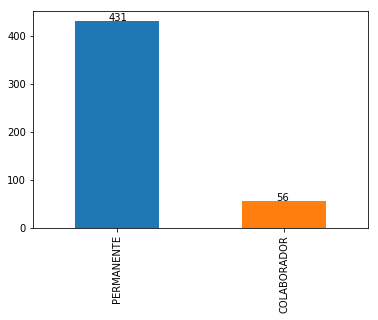

In [5]:
plot = docentes_df.categoria.value_counts().plot(kind='bar')

for idx, value in enumerate(list(docentes_df.categoria.value_counts())): 
    plot.annotate(value,(idx, value), xytext=(-8, 0), textcoords='offset points')


In [6]:
discentes_prof_df = discentes_df[['orientador', 'programa']] 
discentes_prof_df = discentes_prof_df.groupby(['orientador', 'programa']).size().to_frame().reset_index()
discentes_prof_df = discentes_prof_df[['orientador', 'programa']]

discentes_prof_df.head()

,orientador,programa
0,ABEL GUILHERMINO DA SILVA FILHO,CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)
1,ADENILSO DA SILVA SIMAO,CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIO...
2,ADRIANA SANTAROSA VIVACQUA,INFORMÁTICA(31001017110P8)
3,ADRIANO ALONSO VELOSO,CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)
4,ADRIANO AUGUSTO DE MORAES SARMENTO,CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)


In [7]:
discentes_prof_df.orientador.describe()

count                      458
unique                     458
top       MARCO SERPA MOLINARO
freq                         1
Name: orientador, dtype: object

In [8]:
# Professores que nao possuem alunos
docentes_df[~docentes_df.nome.isin(discentes_df.orientador.unique())]

,categoria,ies,nome,prof_id
4,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,BRUNO FEIJO,45093
35,COLABORADOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO GRANDE...,JORGE LUIS NICOLAS AUDY,86202
50,PERMANENTE,UNIVERSIDADE FEDERAL FLUMINENSE,ALINE MARINS PAES,152411
55,PERMANENTE,UNIVERSIDADE FEDERAL FLUMINENSE,BRUNO LOPES VIEIRA,152538
101,COLABORADOR,UNIVERSIDADE FEDERAL DE MINAS GERAIS,CRISTIANO ARBEX VALLE,172391
127,COLABORADOR,UNIVERSIDADE FEDERAL DE MINAS GERAIS,NEWTON JOSE VIEIRA,49000
167,COLABORADOR,UNIVERSIDADE FEDERAL DE PERNAMBUCO,EDSON COSTA DE BARROS CARVALHO FILHO,31315
179,PERMANENTE,UNIVERSIDADE FEDERAL DE PERNAMBUCO,GUSTAVO HENRIQUE PORTO DE CARVALHO,169215
207,PERMANENTE,UNIVERSIDADE FEDERAL DE PERNAMBUCO,PEDRO MACHADO MANHAES DE CASTRO,111945
236,PERMANENTE,UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL,ANDRE GRAHL PEREIRA,166203


In [9]:
docentes_prof_categ_df = docentes_df[['categoria', 'nome']]

In [10]:
docentes_prof_categ_df.head()

,categoria,nome
0,PERMANENTE,ALBERTO BARBOSA RAPOSO
1,PERMANENTE,ALESSANDRO FABRICIO GARCIA
2,COLABORADOR,ANTONIO LUZ FURTADO
3,PERMANENTE,ARNDT VON STAA
4,PERMANENTE,BRUNO FEIJO


In [11]:
discentes_categ_df = pd.merge(docentes_prof_categ_df, discentes_prof_df, left_on='nome', right_on='orientador')
discentes_categ_df = discentes_categ_df[['categoria', 'nome', 'programa']]
discentes_categ_df.head()

,categoria,nome,programa
0,PERMANENTE,ALBERTO BARBOSA RAPOSO,INFORMÁTICA(31005012004P9)
1,PERMANENTE,ALESSANDRO FABRICIO GARCIA,INFORMÁTICA(31005012004P9)
2,COLABORADOR,ANTONIO LUZ FURTADO,INFORMÁTICA(31005012004P9)
3,PERMANENTE,ARNDT VON STAA,INFORMÁTICA(31005012004P9)
4,PERMANENTE,CARLOS JOSE PEREIRA DE LUCENA,INFORMÁTICA(31005012004P9)


In [12]:
profs_permanentes = discentes_categ_df[
    discentes_categ_df.categoria=='PERMANENTE'].programa.value_counts().sort_index()
profs_permanentes

CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                34
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                41
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                                23
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)    63
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               68
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                               47
COMPUTAÇÃO(31003010046P4)                                           39
COMPUTAÇÃO(42001013004P4)                                           52
INFORMÁTICA(31001017110P8)                                          26
INFORMÁTICA(31005012004P9)                                          23
Name: programa, dtype: int64

In [13]:
profs_colaboradores = discentes_categ_df[
    discentes_categ_df.categoria=='COLABORADOR'].programa.value_counts().sort_index()

# ja que nao temos colaboradores em CIÊNCIA DA COMPUTAÇÃO(42005019016P8), adicionamos esta key com value 0
profs_colaboradores['CIÊNCIA DA COMPUTAÇÃO(42005019016P8)'] = 0
profs_colaboradores = profs_colaboradores.sort_index()
profs_colaboradores

CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                 4
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                 6
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                                 0
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)     6
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               14
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                                5
COMPUTAÇÃO(31003010046P4)                                            1
COMPUTAÇÃO(42001013004P4)                                            3
INFORMÁTICA(31001017110P8)                                           2
INFORMÁTICA(31005012004P9)                                           1
Name: programa, dtype: int64

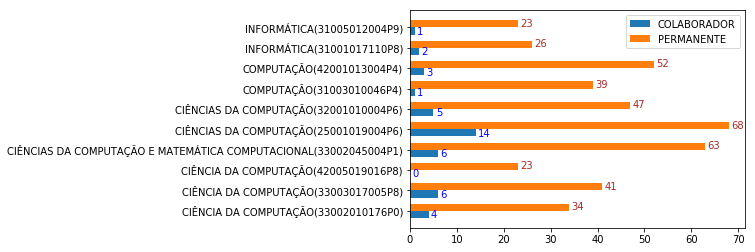

In [14]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(discentes_categ_df.programa.value_counts().sort_index().keys()))

plt1 = ax.barh(ind-width/2, profs_colaboradores, width)

plt2 = ax.barh(ind+width/2, profs_permanentes, width)

# Etiquetas COLABORADOR
for i, v in enumerate(profs_colaboradores):
    ax.text( v + 0.5 ,
            i - 0.2, 
            v, 
            color='blue', 
            fontweight='regular',
            va='center')

# Etiquetas PERMANENTE
for i, v in enumerate(profs_permanentes):
    ax.text( v + 0.5 ,
            i + 0.2, 
            v, 
            color='brown', 
            fontweight='regular',
            va='center')

ax.set_yticks(ind)
ax.set_yticklabels(discentes_categ_df.programa.value_counts().sort_index().keys())

plt.legend([plt1[0], plt2[0]], ['COLABORADOR', 'PERMANENTE'])

plt.show()

## Discentes
2) Quantos alunos (discentes) de Mestrado/Doutorado havia em cada programa em 2017?

In [15]:
discentes_df.head()

,abrev,curso,data_matricula,deficiencia,discente_id,ies,nacionalidade,nivel,nome,orientador,orientadores,programa,raca,sexo,situacao
0,"LEON, A. C. (Principal)",INFORMÁTICA,03/08/2015,Não,889714,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Cuba,Mestrado,ADRIAN CONCEPCION LEON,MARKUS ENDLER,"[{'nome': 'MARKUS ENDLER', 'categoria': 'Docen...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
1,"HERNANDEZ, A. G. (Principal)",INFORMÁTICA,02/03/2015,Não,838354,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,ADRIEL GARCIA HERNANDEZ,RUY LUIZ MILIDIU,"[{'nome': 'RUY LUIZ MILIDIU', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
2,"FUENTES, A. D. (Principal)",INFORMÁTICA,15/04/2016,Não,948329,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ALAIN DOMINGUEZ FUENTES,SERGIO LIFSCHITZ,"[{'nome': 'SERGIO LIFSCHITZ', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
3,"GUEDES, A. L. V. (Principal) GUEDES, ALAN LIVI...",INFORMÁTICA,12/03/2013,Não,565354,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Doutorado,ALAN LIVIO VASCONCELOS GUEDES,SIMONE DINIZ JUNQUEIRA BARBOSA,"[{'nome': 'SIMONE DINIZ JUNQUEIRA BARBOSA', 'c...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO
4,"MENES, A. M. (Principal)",INFORMÁTICA,01/08/2014,Não,784513,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,ALEJANDRO MUSTELIER MENES,SERGIO LIFSCHITZ,"[{'nome': 'SERGIO LIFSCHITZ', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO


In [16]:
discentes_df.nivel.unique()

array(['Mestrado', 'Doutorado', 'Graduação'], dtype=object)

In [17]:
discentes_pos_df = discentes_df[discentes_df.nivel.isin(["Mestrado", "Doutorado"])]
discentes_pos_df = discentes_pos_df[["nivel", "programa"]]
discentes_pos_df.nivel.value_counts()

Mestrado     1789
Doutorado    1647
Name: nivel, dtype: int64

In [18]:
discentes_pos_df.programa.unique()

array(['INFORMÁTICA(31005012004P9)',
       'CIÊNCIA DA COMPUTAÇÃO(42005019016P8)',
       'COMPUTAÇÃO(31003010046P4)',
       'CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)',
       'CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)',
       'COMPUTAÇÃO(42001013004P4)', 'INFORMÁTICA(31001017110P8)',
       'CIÊNCIA DA COMPUTAÇÃO(33003017005P8)',
       'CIÊNCIA DA COMPUTAÇÃO(33002010176P0)',
       'CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)'],
      dtype=object)

In [19]:
# Mestrado
alunos_mestrado = discentes_pos_df[discentes_pos_df.nivel=='Mestrado'].programa.value_counts().sort_index()
alunos_mestrado

CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                133
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                183
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                                137
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)    173
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               337
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                               239
COMPUTAÇÃO(31003010046P4)                                           168
COMPUTAÇÃO(42001013004P4)                                           194
INFORMÁTICA(31001017110P8)                                          110
INFORMÁTICA(31005012004P9)                                          115
Name: programa, dtype: int64

In [20]:
# Doutorado
alunos_doutorado = discentes_pos_df[discentes_pos_df.nivel=='Doutorado'].programa.value_counts().sort_index()
alunos_doutorado

CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                111
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                169
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                                 91
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)    319
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               379
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                               174
COMPUTAÇÃO(31003010046P4)                                           114
COMPUTAÇÃO(42001013004P4)                                           125
INFORMÁTICA(31001017110P8)                                           63
INFORMÁTICA(31005012004P9)                                          102
Name: programa, dtype: int64

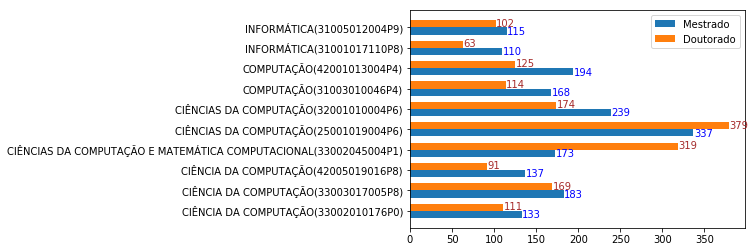

In [21]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(discentes_pos_df.programa.value_counts().sort_index().keys()))

plt1 = ax.barh(ind-width/2, alunos_mestrado, width)

plt2 = ax.barh(ind+width/2, alunos_doutorado, width)

# Etiquetas Mestrado
for i, v in enumerate(alunos_mestrado):
    ax.text( v + 0.5 ,
            i - 0.2, 
            v, 
            color='blue', 
            fontweight='regular',
            va='center')

# Etiquetas Doutorado
for i, v in enumerate(alunos_doutorado):
    ax.text( v + 0.5 ,
            i + 0.2, 
            v, 
            color='brown', 
            fontweight='regular',
            va='center')

ax.set_yticks(ind)
ax.set_yticklabels(discentes_pos_df.programa.value_counts().sort_index().keys())

plt.legend([plt1[0], plt2[0]], ['Mestrado', 'Doutorado'])

plt.show()

## Discentes x Docentes
3) Qual foi a taxa de alunos de Mestrado/Doutorado por professor do quadro permanente em cada programa em 2017?


In [22]:
taxa_df = pd.DataFrame({'Taxa Mestrado': alunos_mestrado/profs_permanentes,
                        'Taxa Doutorado': alunos_doutorado/profs_permanentes}, index=alunos_mestrado.keys())
taxa_df.index.name = 'Categoria'

taxa_df

,Taxa Doutorado,Taxa Mestrado
Categoria,,
CIÊNCIA DA COMPUTAÇÃO(33002010176P0),3.264706,3.911765
CIÊNCIA DA COMPUTAÇÃO(33003017005P8),4.121951,4.463415
CIÊNCIA DA COMPUTAÇÃO(42005019016P8),3.956522,5.956522
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1),5.063492,2.746032
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6),5.573529,4.955882
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6),3.702128,5.085106
COMPUTAÇÃO(31003010046P4),2.923077,4.307692
COMPUTAÇÃO(42001013004P4),2.403846,3.730769
INFORMÁTICA(31001017110P8),2.423077,4.230769


4) Qual foi a distribuição de alunos de Mestrado/Doutorado pelos professores de cada programa em 2017?

In [23]:
discentes_pos_df = discentes_df[discentes_df.nivel.isin(["Mestrado", "Doutorado"])]
discentes_pos_df = discentes_pos_df[["nivel", "programa","orientador"]]

docentes_pos_df = docentes_df[["nome"]]

docentes_alunos_df = pd.merge( docentes_pos_df , discentes_pos_df , left_on='nome' , right_on='orientador' )
docentes_alunos_df = docentes_alunos_df[["nome", "nivel","programa"]]
docentes_alunos_df.head()

,nome,nivel,programa
0,ALBERTO BARBOSA RAPOSO,Mestrado,INFORMÁTICA(31005012004P9)
1,ALBERTO BARBOSA RAPOSO,Doutorado,INFORMÁTICA(31005012004P9)
2,ALBERTO BARBOSA RAPOSO,Mestrado,INFORMÁTICA(31005012004P9)
3,ALBERTO BARBOSA RAPOSO,Mestrado,INFORMÁTICA(31005012004P9)
4,ALBERTO BARBOSA RAPOSO,Doutorado,INFORMÁTICA(31005012004P9)


In [24]:
# Agrupando e contabilizando alunos por professor por nivel
docentes_alunos_grouped_df = docentes_alunos_df.groupby(['nome','nivel'],).count().reset_index()
docentes_alunos_grouped_df.columns = ['professor','nivel','alunos']

docentes_alunos_grouped_df.head()

,professor,nivel,alunos
0,ABEL GUILHERMINO DA SILVA FILHO,Doutorado,9
1,ABEL GUILHERMINO DA SILVA FILHO,Mestrado,4
2,ADENILSO DA SILVA SIMAO,Doutorado,7
3,ADRIANA SANTAROSA VIVACQUA,Doutorado,1
4,ADRIANA SANTAROSA VIVACQUA,Mestrado,7


In [25]:
# Transformando linhas do "nivel" em colunas de "nivel" ( oposto de melt )
docentes_alunos_table = docentes_alunos_grouped_df.pivot_table(
            index=['professor'], 
            columns=['nivel'],
            values='alunos',
            aggfunc=np.sum).fillna(0)


In [26]:
# Readicionando os professores sem alunos ( foram perdidos no merge )
set_docentes_totais = set(docentes_df.nome)
set_docentes_comalunos = set(docentes_alunos_df.nome)
set_docentes_semalunos = set_docentes_totais - set_docentes_comalunos

docentes_semalunos_df = pd.DataFrame( index = list(set_docentes_semalunos) )
docentes_semalunos_df.index.name = 'professor'

docentes_alunos_table = docentes_alunos_table.append( docentes_semalunos_df ).fillna(0)

In [27]:
# Ajustando valores numericos e adicionando coluna "TOTAL"
docentes_alunos_table.Doutorado = docentes_alunos_table.Doutorado.astype(int)
docentes_alunos_table.Mestrado = docentes_alunos_table.Mestrado.astype(int)

docentes_alunos_table['Total'] = docentes_alunos_table['Doutorado'] + docentes_alunos_table['Mestrado']

docentes_alunos_table.head()

,Doutorado,Mestrado,Total
professor,,,
ABEL GUILHERMINO DA SILVA FILHO,9,4,13
ADENILSO DA SILVA SIMAO,7,0,7
ADRIANA SANTAROSA VIVACQUA,1,7,8
ADRIANO ALONSO VELOSO,5,7,12
ADRIANO AUGUSTO DE MORAES SARMENTO,0,2,2


In [28]:
# Sumário 
docentes_alunos_table.describe()

,Doutorado,Mestrado,Total
count,487.000000,487.000000,487.000000
mean,3.293634,3.379877,6.673511
std,2.879261,2.614742,4.269494
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000
50%,3.000000,3.000000,7.000000
75%,5.000000,5.000000,10.000000
max,16.000000,16.000000,23.000000


In [29]:
# TODO: Reprenta graficamente
# Ideia: Eixo X: Quantidade de alunos, Eixo Y: Quantidade de Professores

qtd_professores_por_alunos = docentes_alunos_table['Total'].reset_index()
qtd_professores_por_alunos = qtd_professores_por_alunos.groupby('Total').count()

qtd_professores_por_alunos

,professor
Total,
0,29
1,27
2,46
3,27
4,38
5,44
6,29
7,42
8,40


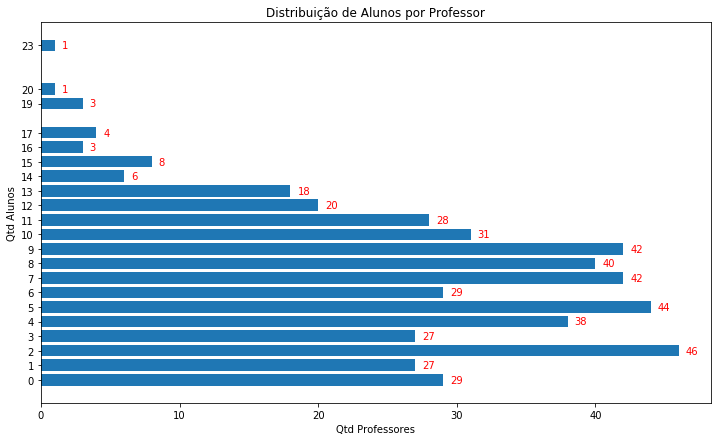

In [30]:
fig, ax = plt.subplots()


plt.barh( qtd_professores_por_alunos.index , qtd_professores_por_alunos.professor  )
plt.yticks( qtd_professores_por_alunos.index , qtd_professores_por_alunos.index )

for i, v in enumerate(qtd_professores_por_alunos.index ):
    ax.text( qtd_professores_por_alunos.iloc[i]['professor'] + 0.5 ,
            v, 
            str(qtd_professores_por_alunos.iloc[i]['professor']), 
            color='red', 
            fontweight='regular',
            va='center')

plt.title( "Distribuição de Alunos por Professor")

plt.xlabel("Qtd Professores")
plt.ylabel("Qtd Alunos")

fig.set_size_inches(12, 7)

plt.show()

## Trabalhos de Conclusão
5) Quantos alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017 (arquivo trabalhos.csv)?

In [31]:
trabalhos_df.head()

,abstract,anexo,area,autor,biblioteca,data_defesa,idioma,ies,keywords,linha,orientador,paginas,palavras_chave,programa,projeto_pesquisa,resumo,tipo,titulo,trabalho_id,volume
0,Spatial concentrations (or spatial clusters) o...,Marcos P. Roriz_2017_Completo.pdf,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,MARCOS PAULINO RORIZ JUNIOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,22/03/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Spatial Clustering;Stream Clustering;Real-ti...,"REDES MÓVEIS, COMPUTAÇÃO UBÍQUA E COMPUTAÇÃO A...",MARKUS ENDLER,121.0,Aglomeração Espacial;Aglomeração em Fluxo de D...,INFORMÁTICA (31005012004P9),-,"Clusters (ou concentrações) de objetos móveis,...",TESE,DG2CEP: An On-line Algorithm for Real-time Det...,5013040,1
1,Quotation Extraction consists of identifying q...,Rafael dos Reis_2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,RAFAEL DOS REIS SILVA,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,08/02/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine Learning;Natural Language Processing...,"APRENDIZADO DE MÁQUINA, RACIOCÍNIO HEURÍSTICO ...",RUY LUIZ MILIDIU,59.0,Processamento de Linguagem Natural;Extração de...,INFORMÁTICA (31005012004P9),-,A Extração de Citações consiste na identificaç...,DISSERTAÇÃO,Direct and Indirect Quotation Extraction for P...,5013130,1
2,The classification of objects in real contexts...,Luis Marcelo Vital_2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,LUIS MARCELO VITAL ABREU FONSECA,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,07/03/2017,PORTUGUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine Learning;Image Processing;Convolutio...,"APRENDIZADO DE MÁQUINA, RACIOCÍNIO HEURÍSTICO ...",RUY LUIZ MILIDIU,96.0,Aprendizado de Máquina;Processamento de Imagen...,INFORMÁTICA (31005012004P9),-,A classificação de imagens em contexto real é ...,DISSERTAÇÃO,Classificação de Objetos em Contexto Real por ...,5013137,1
3,Quotation Extraction and Attribution is the ta...,Luis Felipe Miller 2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,LUIS FELIPE MULLER DE OLIVEIRA HENRIQUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,08/03/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine learning;Natural language processing...,-,RUY LUIZ MILIDIU,68.0,Aprendizado de máquina;Processamento de lingua...,INFORMÁTICA (31005012004P9),-,A Extração e Atribuição de Citações é a tarefa...,DISSERTAÇÃO,Deep Architecture for Quotation Extraction,5017265,1
4,Driving is a daily task that allows individual...,Igor Oliveira_2017_Completo.pdf,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,IGOR OLIVEIRA VASCONCELOS,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,31/03/2017,PORTUGUES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Online anomaly detection;complex event proce...,PROJETO E IMPLEMENTAÇÃO DE MIDDLEWARE,MARKUS ENDLER,102.0,Detecção online de anomalia;processamento de e...,INFORMÁTICA (31005012004P9),-,Dirigir é uma tarefa diária que permite uma lo...,TESE,Detecção móvel e online de anomalia em múltipl...,5017316,1


In [32]:
trabalhos_categ_df = trabalhos_df.copy() 

trabalhos_categ_df['categoria'] = trabalhos_categ_df.apply(
    lambda row: 'Mestrado' if row['tipo'] == 'DISSERTAÇÃO' else 'Doutorado', axis=1
)

In [33]:
trabalhos_categ_df.categoria.value_counts()

Mestrado     357
Doutorado    285
Name: categoria, dtype: int64

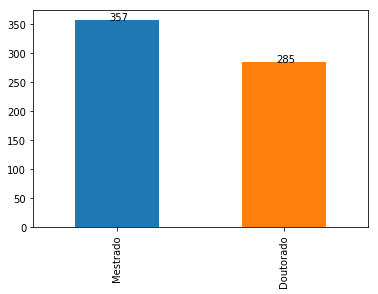

In [34]:
plot = trabalhos_categ_df.categoria.value_counts().plot(kind='bar')

for idx, value in enumerate(list(trabalhos_categ_df.categoria.value_counts())): 
    plot.annotate(value,(idx, value), xytext=(-8, 0), textcoords='offset points')

6) Como os trabalhos de Mestrado/Doutorado defendidos em 2017 foram distribuídos pelas áreas de pesquisa dos programas?

In [35]:
# Inspecionando os dados
q06_inspect = trabalhos_df[trabalhos_df.tipo.isin(["TESE", "DISSERTAÇÃO"])]
q06_inspect = q06_inspect[["tipo", "area"]]

sorted( q06_inspect.area.unique() )

['-',
 'ALGORITMOS E OTIMIZAÇÃO',
 'ARQUITETURA DE COMPUTADORES E SISTEMAS DIGITAIS',
 'BANCO DE DADOS',
 'BANCOS DE DADOS',
 'CIENCIA DA COMPUTACAO',
 'CIÊNCIA DA COMPUTAÇÃO',
 'CIÊNCIAS  DE COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL',
 'COMPUTAÇÃO CIENTÍFICA E SISTEMAS DE POTÊNCIA',
 'COMPUTAÇÃO GRÁFICA',
 'COMPUTAÇÃO INTELIGENTE',
 'COMPUTAÇÃO VISUAL',
 'Ciência de Dados e Engenharia de Software',
 'Computação Visual',
 'ENGENHARIA DA COMPUTAÇÃO',
 'ENGENHARIA DA INFORMAÇÃO',
 'ENGENHARIA DE SISTEMAS E INFORMAÇÃO',
 'ENGENHARIA DE SOFTWARE',
 'ENGENHARIA DE SOFTWARE E LINGUAGENS DE PROGRAMAÇÃO',
 'HIPERTEXTO E MULTIMÍDIA',
 'INTELIGÊNCIA COMPUTACIONAL',
 'INTERAÇÃO HUMANO-COMPUTADOR',
 'Inteligência Artificial',
 'LINGUAGENS DE PROGRAMAÇÃO',
 'OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO',
 'Projeto de Sistemas Eletrônicos e Computacionais',
 'REDES DE COMPUTADORES E SISTEMAS DISTRIBUIDOS',
 'REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS',
 'Redes de Computadores',
 'SISTEMAS DE COMPUTAÇÃO',
 'Sis

In [36]:
# Removendo erros de tipagem!
q06_inspect['area'] = q06_inspect.apply(
    lambda row: 'BANCOS DE DADOS' if row['area'] == 'BANCO DE DADOS' else row['area'], axis=1 )

q06_inspect['area'] = q06_inspect.apply(
    lambda row: 'CIÊNCIA DA COMPUTAÇÃO' if row['area'] == 'CIENCIA DA COMPUTACAO' else row['area'], axis=1 )

q06_inspect['area'] = q06_inspect.apply(
    lambda row: 'TEORIA DA COMPUTAÇÃO' if row['area'] == 'Teoria da Computação' else row['area'], axis=1 )

q06_inspect['area'] = q06_inspect.apply(
    lambda row: 'COMPUTAÇÃO VISUAL' if row['area'] == 'Computação Visual' else row['area'], axis=1 )

q06_inspect['area'] = q06_inspect.apply(
    lambda row: 'REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS' if row['area'] == 'REDES DE COMPUTADORES E SISTEMAS DISTRIBUIDOS' else row['area'], axis=1 )

q06_inspect['area'] = q06_inspect.apply(
    lambda row: 'REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS' if row['area'] == 'Redes de Computadores' else row['area'], axis=1 )

q06_inspect['area'] = q06_inspect.apply(
    lambda row: 'SISTEMAS DE COMPUTAÇÃO' if row['area'] == 'Sistemas de Computação' else row['area'], axis=1 )

sorted( q06_inspect.area.unique() )

['-',
 'ALGORITMOS E OTIMIZAÇÃO',
 'ARQUITETURA DE COMPUTADORES E SISTEMAS DIGITAIS',
 'BANCOS DE DADOS',
 'CIÊNCIA DA COMPUTAÇÃO',
 'CIÊNCIAS  DE COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL',
 'COMPUTAÇÃO CIENTÍFICA E SISTEMAS DE POTÊNCIA',
 'COMPUTAÇÃO GRÁFICA',
 'COMPUTAÇÃO INTELIGENTE',
 'COMPUTAÇÃO VISUAL',
 'Ciência de Dados e Engenharia de Software',
 'ENGENHARIA DA COMPUTAÇÃO',
 'ENGENHARIA DA INFORMAÇÃO',
 'ENGENHARIA DE SISTEMAS E INFORMAÇÃO',
 'ENGENHARIA DE SOFTWARE',
 'ENGENHARIA DE SOFTWARE E LINGUAGENS DE PROGRAMAÇÃO',
 'HIPERTEXTO E MULTIMÍDIA',
 'INTELIGÊNCIA COMPUTACIONAL',
 'INTERAÇÃO HUMANO-COMPUTADOR',
 'Inteligência Artificial',
 'LINGUAGENS DE PROGRAMAÇÃO',
 'OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO',
 'Projeto de Sistemas Eletrônicos e Computacionais',
 'REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS',
 'SISTEMAS DE COMPUTAÇÃO',
 'TEORIA DA COMPUTAÇÃO']

In [37]:
# Preparando os dados
q06_trabalhos_programa = q06_inspect[["tipo", "area"]]
q06_trabalhos_programa = q06_trabalhos_programa.sort_index()

q06_trabalhos_tese = q06_trabalhos_programa[q06_trabalhos_programa.tipo == "TESE"]
q06_trabalhos_tese = q06_trabalhos_tese.groupby('area').count()
q06_trabalhos_tese.columns = ['teses']

q06_trabalhos_dissertacao = q06_trabalhos_programa[q06_trabalhos_programa.tipo == "DISSERTAÇÃO"]
q06_trabalhos_dissertacao = q06_trabalhos_dissertacao.groupby('area').count()
q06_trabalhos_dissertacao.columns = ['dissertacoes']

In [38]:
# Une os dataframes em um unico dataframe. Motivo: certificar-se de q todas as entradas existem para todas a areas.
q06_trabalhos = q06_trabalhos_tese.append(q06_trabalhos_dissertacao)
q06_trabalhos = q06_trabalhos.fillna(0)
q06_trabalhos = q06_trabalhos.sort_index()

q06_trabalhos = q06_trabalhos.groupby(level=0).sum()
q06_trabalhos.dissertacoes = q06_trabalhos.dissertacoes.astype(int)
q06_trabalhos.teses = q06_trabalhos.teses.astype(int)

q06_trabalhos

,dissertacoes,teses
area,,
-,4,1
ALGORITMOS E OTIMIZAÇÃO,4,5
ARQUITETURA DE COMPUTADORES E SISTEMAS DIGITAIS,1,2
BANCOS DE DADOS,10,6
CIÊNCIA DA COMPUTAÇÃO,143,54
CIÊNCIAS DE COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL,27,43
COMPUTAÇÃO CIENTÍFICA E SISTEMAS DE POTÊNCIA,0,1
COMPUTAÇÃO GRÁFICA,6,0
COMPUTAÇÃO INTELIGENTE,14,21


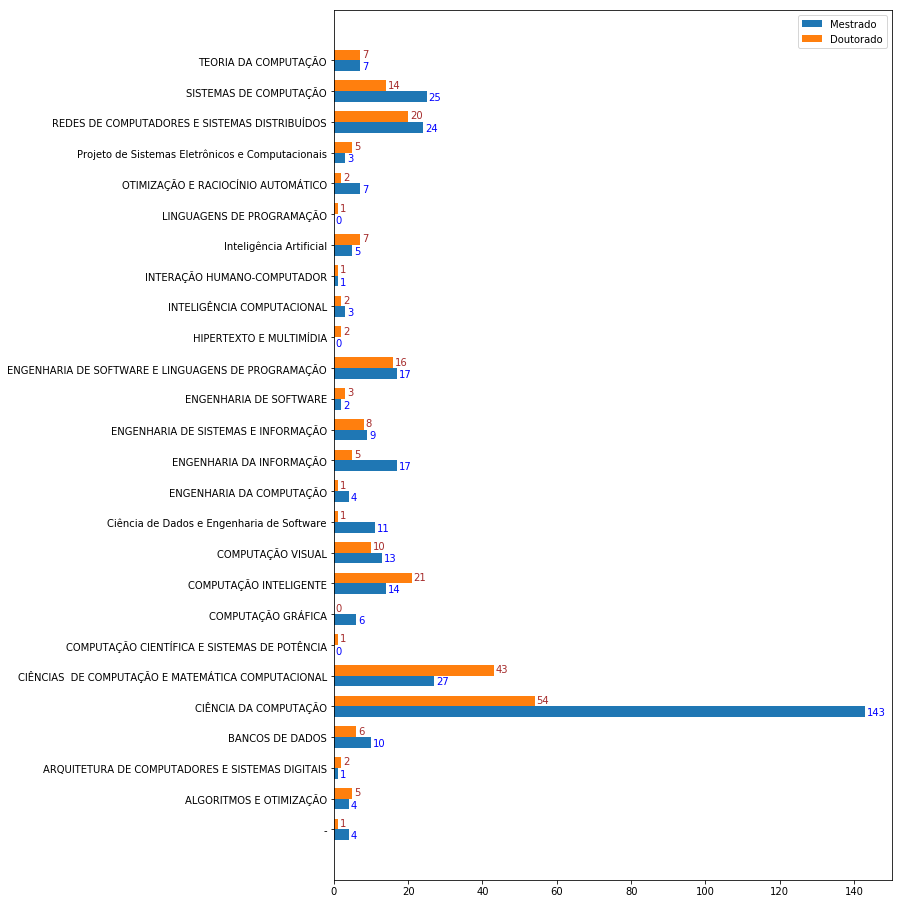

In [39]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(q06_trabalhos.index))

plt1 = ax.barh(ind-width/2, q06_trabalhos.dissertacoes, width)
plt2 = ax.barh(ind+width/2, q06_trabalhos.teses, width)

# Etiquetas Mestrado
for i, v in enumerate( q06_trabalhos.dissertacoes ):
    ax.text( v + 0.5 ,
            i - 0.2, 
            v, 
            color='blue', 
            fontweight='regular',
            va='center')

# Etiquetas Doutorado
for i, v in enumerate( q06_trabalhos.teses ):
    ax.text( v + 0.5 ,
            i + 0.2, 
            v, 
            color='brown', 
            fontweight='regular',
            va='center')


ax.set_yticks(ind)
ax.set_yticklabels(q06_trabalhos.index)

plt.legend([plt1[0], plt2[0]], ['Mestrado', 'Doutorado'])

fig.set_size_inches(10, 16)

plt.show()

7) Como as defesas de Mestrado/Doutorado foram distribuídas ao longo do ano de 2017?

In [40]:
trabalhos_categ_df["data_defesa"] = pd.to_datetime(trabalhos_categ_df["data_defesa"])
trabalhos_categ_df = trabalhos_categ_df[["data_defesa", "categoria"]]

In [41]:
# Mestrado
trabalhos_mestrado = trabalhos_categ_df[trabalhos_categ_df.categoria == "Mestrado"].data_defesa.groupby(
    trabalhos_categ_df["data_defesa"].dt.month).count()

trabalhos_mestrado

data_defesa
1.0     12
2.0     34
3.0     72
4.0     29
5.0     18
6.0     26
7.0     33
8.0     38
9.0     24
10.0    18
11.0    28
12.0    25
Name: data_defesa, dtype: int64

In [42]:
# Doutorao
trabalhos_doutorado = trabalhos_categ_df[trabalhos_categ_df.categoria == "Doutorado"].data_defesa.groupby(
    trabalhos_categ_df["data_defesa"].dt.month).count()

trabalhos_doutorado

data_defesa
1.0      9
2.0     21
3.0     27
4.0      9
5.0     17
6.0     19
7.0     15
8.0     31
9.0     22
10.0    20
11.0    19
12.0    29
Name: data_defesa, dtype: int64

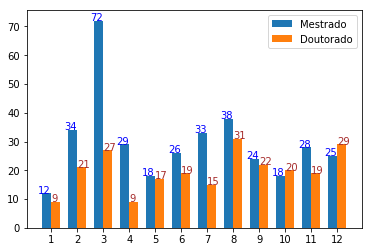

In [43]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(trabalhos_categ_df.data_defesa.groupby(
    trabalhos_categ_df["data_defesa"].dt.month).count().keys()))

plt1 = ax.bar(ind-width/2, trabalhos_mestrado, width)

plt2 = ax.bar(ind+width/2, trabalhos_doutorado, width)

# Etiquetas Mestrado
for i, v in enumerate(trabalhos_mestrado):
    ax.text(i-0.5,
            v + 1, 
            v, 
            color='blue', 
            fontweight='regular',
            va='center')

# Etiquetas Doutorado
for i, v in enumerate(trabalhos_doutorado):
    ax.text(i,
            v + 1, 
            v, 
            color='brown', 
            fontweight='regular',
            va='center')

ax.set_xticks(ind)
ax.set_xticklabels(ind+1)

plt.legend([plt1[0], plt2[0]], ['Mestrado', 'Doutorado'])

plt.show()

## Discentes x Trabalhos de Conclusão
8) Qual fração de alunos de Mestrado/Doutorado (do total em cada programa) defendeu em 2017?

In [44]:
# Obtendo total de alunos por programa
q08_alunos_programa_mestrado = discentes_df[discentes_df.nivel.isin(["Mestrado"])]
q08_alunos_programa_mestrado = q08_alunos_programa_mestrado[['programa','nivel']]
q08_alunos_programa_mestrado = q08_alunos_programa_mestrado.groupby('programa').count()
q08_alunos_programa_mestrado.columns = ['alunos']
q08_alunos_programa_mestrado = q08_alunos_programa_mestrado.sort_index().reset_index()

q08_alunos_programa_doutorado = discentes_df[discentes_df.nivel.isin(["Doutorado"])]
q08_alunos_programa_doutorado = q08_alunos_programa_doutorado[['programa','nivel']]
q08_alunos_programa_doutorado = q08_alunos_programa_doutorado.groupby('programa').count()
q08_alunos_programa_doutorado.columns = ['alunos']
q08_alunos_programa_doutorado = q08_alunos_programa_doutorado.sort_index().reset_index()

In [45]:
# Preparando os dados dos trabalhos
q08_trabalhos_programa = trabalhos_df[trabalhos_df.tipo.isin(["TESE", "DISSERTAÇÃO"])]
q08_trabalhos_programa = q08_trabalhos_programa[["tipo", "programa"]]

q08_trabalhos_tese = q08_trabalhos_programa[q08_trabalhos_programa.tipo == "TESE"]
q08_trabalhos_tese = q08_trabalhos_tese.groupby('programa').count()
q08_trabalhos_tese.columns = ['trabalhos']
q08_trabalhos_tese = q08_trabalhos_tese.sort_index().reset_index()

q08_trabalhos_dissertacao = q08_trabalhos_programa[q08_trabalhos_programa.tipo == "DISSERTAÇÃO"]
q08_trabalhos_dissertacao = q08_trabalhos_dissertacao.groupby('programa').count()
q08_trabalhos_dissertacao.columns = ['trabalhos']
q08_trabalhos_dissertacao = q08_trabalhos_dissertacao.sort_index().reset_index()


In [46]:
# Atualizado para valores relativos ( fracao )
q08_trabalhos_dissertacao['alunos'] = q08_alunos_programa_mestrado.alunos
q08_trabalhos_dissertacao['fracao'] = q08_trabalhos_dissertacao.trabalhos / q08_alunos_programa_mestrado.alunos

q08_trabalhos_tese['alunos'] = q08_alunos_programa_doutorado.alunos
q08_trabalhos_tese['fracao'] = q08_trabalhos_tese.trabalhos / q08_alunos_programa_doutorado.alunos


In [47]:
q08_trabalhos_dissertacao

,programa,trabalhos,alunos,fracao
0,CIÊNCIA DA COMPUTAÇÃO (33002010176P0),36,133,0.270677
1,CIÊNCIA DA COMPUTAÇÃO (33003017005P8),31,183,0.169399
2,CIÊNCIA DA COMPUTAÇÃO (42005019016P8),25,137,0.182482
3,CIÊNCIAS DA COMPUTAÇÃO (25001019004P6),65,173,0.375723
4,CIÊNCIAS DA COMPUTAÇÃO (32001010004P6),65,337,0.192878
5,CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIO...,27,239,0.112971
6,COMPUTAÇÃO (31003010046P4),25,168,0.148810
7,COMPUTAÇÃO (42001013004P4),41,194,0.211340
8,INFORMÁTICA (31001017110P8),20,110,0.181818
9,INFORMÁTICA (31005012004P9),22,115,0.191304


In [48]:
q08_trabalhos_tese

,programa,trabalhos,alunos,fracao
0,CIÊNCIA DA COMPUTAÇÃO (33002010176P0),18,111,0.162162
1,CIÊNCIA DA COMPUTAÇÃO (33003017005P8),9,169,0.053254
2,CIÊNCIA DA COMPUTAÇÃO (42005019016P8),19,91,0.208791
3,CIÊNCIAS DA COMPUTAÇÃO (25001019004P6),59,319,0.184953
4,CIÊNCIAS DA COMPUTAÇÃO (32001010004P6),10,379,0.026385
5,CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIO...,44,174,0.252874
6,COMPUTAÇÃO (31003010046P4),27,114,0.236842
7,COMPUTAÇÃO (42001013004P4),28,125,0.224000
8,INFORMÁTICA (31001017110P8),7,63,0.111111
9,INFORMÁTICA (31005012004P9),17,102,0.166667


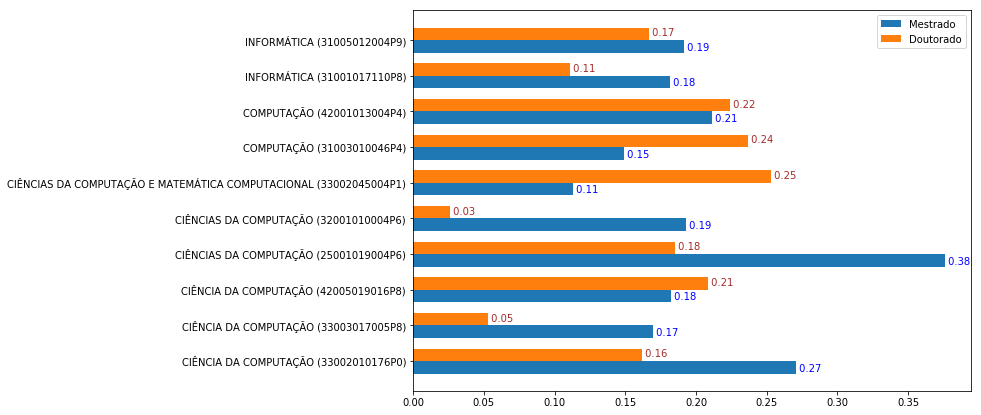

In [49]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(q08_trabalhos_tese.index))

plt1 = ax.barh(ind-width/2, q08_trabalhos_dissertacao.fracao, width)
plt2 = ax.barh(ind+width/2, q08_trabalhos_tese.fracao, width)

# Etiquetas Mestrado
for i, v in enumerate( q08_trabalhos_dissertacao.fracao ):
    ax.text( v,
            i - 0.2, 
            " {:.2f}".format(v), 
            color='blue', 
            fontweight='regular',
            va='center',
            ha='left',
            )

# Etiquetas Doutorado
for i, v in enumerate( q08_trabalhos_tese.fracao ):
    ax.text( v,
            i + 0.2, 
            " {:.2f}".format(v), 
            color='brown', 
            fontweight='regular',
            va='center',
            ha='left' )
               


ax.set_yticks(ind)
ax.set_yticklabels(q08_trabalhos_tese.programa)

plt.legend([plt1[0], plt2[0]], ['Mestrado', 'Doutorado'])

fig.set_size_inches(10, 7)

plt.show()

## Produção
9) Quantos artigos de periódico/trabalhos em anais foram publicados por cada programa em 2017?

In [50]:
pd.options.display.max_columns = 40
producao_df.head()

,anais_titulo,ano,area,cidade,dict_paper_autores,divulgacao,doi,edicao,editora,evento,fasciculo,idioma,ies,issn,issn_isbn,linha,natureza,num_discentes,num_docentes,num_externos,obs,pagina_final,pagina_inicial,pais,paper_autores,paper_id,periodico,programa,projeto,serie,subtipo,tipo,titulo,url,volume
0,NaN,2017,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,New York,"[{'nome': 'BERTO DE TACIO PEREIRA GOMES', 'cat...",MEIO DIGITAL,DOI: 10.1002/cpe.4043,NaN,Wiley,NaN,11,Inglês,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,1532-0634,NaN,PROJETO E IMPLEMENTAÇÃO DE MIDDLEWARE,Completo,0,1,4,First online Dec 2016,19,1,NaN,"['BERTO DE TACIO PEREIRA GOMES', 'LUIZ CARLOS ...",5583631,(1532-0634) CONCURRENY AND COMPUTATION (ONLINE),INFORMÁTICA (31005012004P9),NÃO INFORMADO,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,A COMPREHENSIVE AND SCALABLE MIDDLEWARE FOR AM...,http://onlinelibrary.wiley.com/doi/10.1002/cpe...,29
1,Proceedings of XVI Brazilian Symposium of Comp...,2017,COMPUTAÇÃO GRÁFICA,Curitiba,"[{'nome': 'PEDRO IGOR PORFIRIO SAMPAIO', 'cate...",MEIO DIGITAL,NaN,16,NaN,Simposio Brasileiro de Jogos e Entretenimento ...,-,Inglês,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,NaN,-,"JOGOS, VFX E ENTRETENIMENTO DIGITAL",TRABALHO COMPLETO,1,1,2,-,8,1,Brasil,"['PEDRO IGOR PORFIRIO SAMPAIO', 'AUGUSTO CESAR...",5310280,NaN,INFORMÁTICA (31005012004P9),NÃO INFORMADO,-,TRABALHO EM ANAIS,BIBLIOGRÁFICA,A FAST APPROACH FOR AUTOMATIC GENERATION OF PO...,http://https://www.sbgames.org/sbgames2017/pap...,1
2,NaN,2017,NaN,NaN,"[{'nome': 'MARCIO RICARDO ROSEMBERG', 'categor...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,NaN,NaN,NaN,Série de Relatórios de Pesquisa: Monografias e...,1,2,0,NaN,NaN,NaN,NaN,"['MARCIO RICARDO ROSEMBERG', 'DANIEL SCHWABE',...",5733069,NaN,INFORMÁTICA (31005012004P9),NaN,NaN,OUTRO,BIBLIOGRÁFICA,A HYBRID BLOCK AND STREAM CIPHER ENCRYPTION AL...,NaN,NaN
3,NaN,2017,TEORIA DA COMPUTAÇÃO,Amsterdam,"[{'nome': 'FREDERICO GALAXE PAES', 'categoria'...",MEIO DIGITAL,10.1016/j.ejor.2016.07.022,NaN,Elsevier,NaN,3,Inglês,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,0377-2217,NaN,ALGORITMOS E COMPLEXIDADE,Completo,0,1,2,-,756,742,NaN,"['FREDERICO GALAXE PAES', 'ARTUR ALVES PESSOA'...",5653523,(0377-2217) EUROPEAN JOURNAL OF OPERATIONAL RE...,INFORMÁTICA (31005012004P9),NÃO INFORMADO,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,A HYBRID GENETIC ALGORITHM WITH DECOMPOSITION ...,https://www.sciencedirect.com/science/article/...,256
4,NaN,2017,NÃO INFORMADA,-,"[{'nome': 'LUIS PAULO SANTOS VALENTE', 'catego...",MEIO DIGITAL,10.1007/s00779-017-1107-0,NaN,-,NaN,-,Inglês,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,1617-4909,NaN,NÃO INFORMADA,Completo,0,2,2,-,24,1,NaN,"['LUIS PAULO SANTOS VALENTE', 'BRUNO FEIJO', '...",6293392,(1617-4909) PERSONAL AND UBIQUITOUS COMPUTING ...,INFORMÁTICA (31005012004P9),NÃO INFORMADO,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,A METHOD TO ASSESS PERVASIVE QUALITIES IN MOBI...,[doi:10.1007/s00779-017-1107-0],21


In [51]:
# Cria dataframe para anais e outro pra periodicos
producao_anais_df = producao_df[producao_df.subtipo == 'TRABALHO EM ANAIS']
producao_periodicos_df = producao_df[producao_df.subtipo == 'ARTIGO EM PERIÓDICO']

In [52]:
trabalhos_anais = producao_anais_df.programa.value_counts().sort_index()
trabalhos_anais

CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                                 91
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                                156
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                                145
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                               208
CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)                               226
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)    230
COMPUTAÇÃO (31003010046P4)                                           131
COMPUTAÇÃO (42001013004P4)                                           153
INFORMÁTICA (31001017110P8)                                           81
INFORMÁTICA (31005012004P9)                                           83
Name: programa, dtype: int64

In [53]:
artigos_periodicos = producao_periodicos_df.programa.value_counts().sort_index()
artigos_periodicos

CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                                 65
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                                 84
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                                 38
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                               101
CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)                                86
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)    140
COMPUTAÇÃO (31003010046P4)                                            62
COMPUTAÇÃO (42001013004P4)                                            76
INFORMÁTICA (31001017110P8)                                           41
INFORMÁTICA (31005012004P9)                                           54
Name: programa, dtype: int64

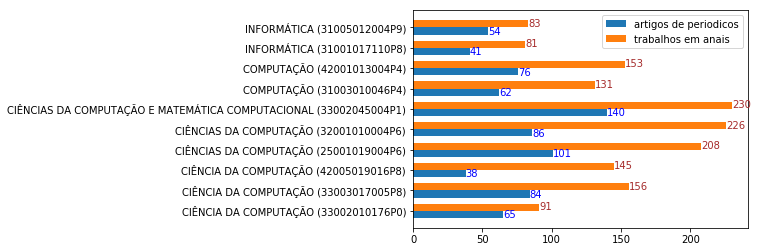

In [54]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(artigos_periodicos.keys()))

plt1 = ax.barh(ind-width/2, artigos_periodicos, width)

plt2 = ax.barh(ind+width/2, trabalhos_anais, width)

# Etiquetas artigos de periodicos
for i, v in enumerate( artigos_periodicos ):
    ax.text( v,
            i - 0.2, 
            v, 
            color='blue', 
            fontweight='regular',
            va='center',
            ha='left',
            )

# Etiquetas trabalhos em anais
for i, v in enumerate( trabalhos_anais ):
    ax.text( v,
            i + 0.2, 
            v, 
            color='brown', 
            fontweight='regular',
            va='center',
            ha='left' )

ax.set_yticks(ind)
ax.set_yticklabels(artigos_periodicos.keys())

plt.legend([plt1[0], plt2[0]], ['artigos de periodicos', 'trabalhos em anais'])

plt.show()

10) Qual é a taxa de artigos de periódico/trabalhos em anais por número de docentes permanentes de cada programa em 2017?

In [55]:
# Docentes Permanentes por Programa
q10_docentes = docentes_df[docentes_df.categoria.isin(["PERMANENTE"])]
q10_docentes = q10_docentes[["nome"]]

q10_discentes = discentes_df[["programa","orientador"]]

q10_docentes = pd.merge( docentes_pos_df , discentes_pos_df , left_on='nome' , right_on='orientador' )
q10_docentes = q10_docentes[["nome", "programa"]]
q10_docentes.head()

q10_docentes_programa = q10_discentes.groupby('programa').count()
q10_docentes_programa.columns = ['docentes']

q10_docentes_programa

,docentes
programa,
CIÊNCIA DA COMPUTAÇÃO(33002010176P0),242
CIÊNCIA DA COMPUTAÇÃO(33003017005P8),344
CIÊNCIA DA COMPUTAÇÃO(42005019016P8),222
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1),492
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6),715
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6),413
COMPUTAÇÃO(31003010046P4),170
COMPUTAÇÃO(42001013004P4),319
INFORMÁTICA(31001017110P8),160


In [56]:
# Artigos em anais
q10_anais = producao_df[producao_df.subtipo.isin(['TRABALHO EM ANAIS'])]
q10_anais = q10_anais[['programa','paper_id']]

q10_anais['programa'] = q10_anais.apply(
    lambda row: row['programa'].replace(' (', '('), axis=1 )

q10_anais = q10_anais.groupby('programa').count()
q10_anais.columns = ['papers']

q10_anais

,papers
programa,
CIÊNCIA DA COMPUTAÇÃO(33002010176P0),91
CIÊNCIA DA COMPUTAÇÃO(33003017005P8),156
CIÊNCIA DA COMPUTAÇÃO(42005019016P8),145
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1),230
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6),208
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6),226
COMPUTAÇÃO(31003010046P4),131
COMPUTAÇÃO(42001013004P4),153
INFORMÁTICA(31001017110P8),81


In [57]:
# Une os dataframes em um unico dataframe. Motivo: certificar-se de q todas as entradas existem para todas os programas.
q10_estatisticas = q10_docentes_programa.append(q10_anais)
q10_estatisticas = q10_estatisticas.fillna(0)
q10_estatisticas = q10_estatisticas.sort_index()

q10_estatisticas = q10_estatisticas.groupby(level=0).sum()
q10_estatisticas.docentes = q10_estatisticas.docentes.astype(int)
q10_estatisticas.papers = q10_estatisticas.papers.astype(int)

q10_estatisticas['taxa'] = q10_estatisticas['papers'] / q10_estatisticas['docentes']

q10_estatisticas

,docentes,papers,taxa
programa,,,
CIÊNCIA DA COMPUTAÇÃO(33002010176P0),242,91,0.376033
CIÊNCIA DA COMPUTAÇÃO(33003017005P8),344,156,0.453488
CIÊNCIA DA COMPUTAÇÃO(42005019016P8),222,145,0.653153
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1),492,230,0.467480
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6),715,208,0.290909
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6),413,226,0.547215
COMPUTAÇÃO(31003010046P4),170,131,0.770588
COMPUTAÇÃO(42001013004P4),319,153,0.479624
INFORMÁTICA(31001017110P8),160,81,0.506250


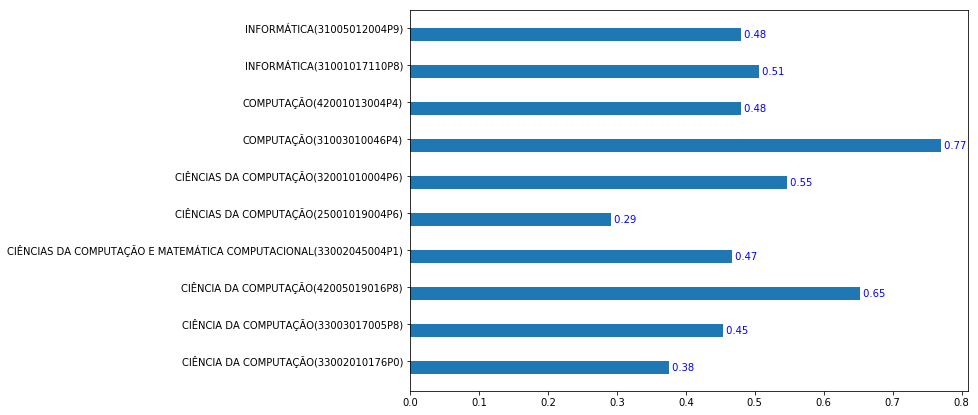

In [58]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(q10_estatisticas.index))

plt1 = ax.barh(ind-width/2, q10_estatisticas.taxa, width)

# Etiquetas
for i, v in enumerate( q10_estatisticas.taxa ):
    ax.text( v,
            i - 0.2, 
            " {:.2f}".format(v), 
            color='blue', 
            fontweight='regular',
            va='center',
            ha='left',
            )


ax.set_yticks(ind)
ax.set_yticklabels(q10_estatisticas.index)

fig.set_size_inches(10, 7)

plt.show()

11) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de discentes?


In [59]:
# trabalhos em anais com coautoria/ total trabalhos em anais
producao_anais_df[producao_anais_df.num_discentes > 0].shape[0]/producao_anais_df.shape[0]

0.7227393617021277

In [60]:
# artigos de periodicos com coautoria/ total artigos de periodicos
producao_periodicos_df[producao_periodicos_df.num_discentes > 0].shape[0]/producao_periodicos_df.shape[0]

0.4350736278447122

12) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de participantes externos?

In [61]:
# trabalhos em anais com coautoria/ total trabalhos em anais
producao_anais_df[producao_anais_df.num_externos > 0].shape[0]/producao_anais_df.shape[0]

0.7101063829787234

In [62]:
# artigos de periodicos com coautoria/ total artigos de periodicos
producao_periodicos_df[producao_periodicos_df.num_externos > 0].shape[0]/producao_periodicos_df.shape[0]

0.8835341365461847

## Produção x Qualis
13) Qual é a distribuição de artigos de periódico publicados em 2017, por estrato do Qualis?

In [63]:
qualis_df.head()

,ISSN,Título,Estrato
0,0360-0300,ACM COMPUTING SURVEYS,A1
1,0730-0301,ACM TRANSACTIONS ON GRAPHICS,A1
2,0098-3500,ACM TRANSACTIONS ON MATHEMATICAL SOFTWARE,A1
3,0254-5330,ANNALS OF OPERATION RESEARCH,A1
4,1572-9338,ANNALS OF OPERATIONS RESEARCH (DORDRECHT. ONLINE),A1


In [64]:
qualis_df.Estrato.unique()

array(['A1', 'A2', 'B1', 'B2', 'B3', 'B4', 'B5', 'C '], dtype=object)

In [65]:
producao_periodicos_issn_df = producao_periodicos_df[['issn']]
qualis_producao_df = pd.merge(producao_periodicos_issn_df, qualis_df, left_on='issn', right_on='ISSN')

qualis_producao_df.head()

,issn,ISSN,Título,Estrato
0,1532-0634,1532-0634,CONCURRENY AND COMPUTATION (ONLINE),A2
1,0377-2217,0377-2217,EUROPEAN JOURNAL OF OPERATIONAL RESEARCH,A1
2,0377-2217,0377-2217,EUROPEAN JOURNAL OF OPERATIONAL RESEARCH,A1
3,0377-2217,0377-2217,EUROPEAN JOURNAL OF OPERATIONAL RESEARCH,A1
4,0377-2217,0377-2217,EUROPEAN JOURNAL OF OPERATIONAL RESEARCH,A1


In [66]:
estratos = qualis_producao_df.Estrato.value_counts().sort_index()
estratos

A1    183
A2    162
B1    149
B2     22
B3     64
B4     11
B5     35
C      23
Name: Estrato, dtype: int64

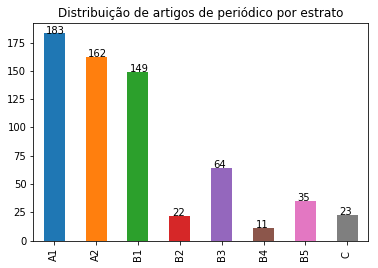

In [67]:
plot = estratos.plot('bar', title='Distribuição de artigos de periódico por estrato')

for idx, value in enumerate(list(estratos)): 
    plot.annotate(value,(idx, value), xytext=(-8, 0), textcoords='offset points')

14) Considerando os pesos dos artigos de cada estrato do índice restrito ({'A1': 1, 'A2': 0.85, 'B1': 0.70}), qual o índice restrito relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?


In [142]:
# Dicionario de Pesos
q14_pesos = {'A1': 1.0, 'A2': 0.85, 'B1': 0.70, 'B2': 0.0, 'B3': 0.0, 'B4': 0.0, 'B5': 0.0, 'C': 0.0}

# DataFrame dos pesos
q14_pesos_df = pd.DataFrame( list(q14_pesos.items())  )
q14_pesos_df.columns = ['IdxRestrito','peso']
q14_pesos_df = q14_pesos_df.set_index('IdxRestrito')

In [143]:
# Obter numero de docentes permanentes
q14_docentes = docentes_df[docentes_df.categoria.isin(["PERMANENTE"])]
q14_docentes = q14_docentes[["nome"]]
q14_docentes_qty = len(q14_docentes.nome.unique())

In [160]:
# Obter lista de estratos da questao 13
q14_estratos_df = pd.DataFrame( index = estratos.keys() , data=estratos  )
q14_estratos_df.index.name = "IdxRestrito"

# Merge
q14_estratos_df = pd.merge( q14_estratos_df , q14_pesos_df , left_index = True , right_index = True )

# Calculo do estrato ponderado
q14_estratos_df['ponderado'] = q14_estratos_df['Estrato'] * q14_estratos_df['peso']

# Calculo do ponderado por total docentes
q14_estratos_df['fator'] = q14_estratos_df['ponderado'] / q14_docentes_qty

# Ordernando
q14_estratos_df = q14_estratos_df.sort_values('fator')

q14_estratos_df

,Estrato,peso,ponderado,fator
IdxRestrito,,,,
B2,22,0.00,0.0,0.000000
B3,64,0.00,0.0,0.000000
B4,11,0.00,0.0,0.000000
B5,35,0.00,0.0,0.000000
B1,149,0.70,104.3,0.241995
A2,162,0.85,137.7,0.319490
A1,183,1.00,183.0,0.424594


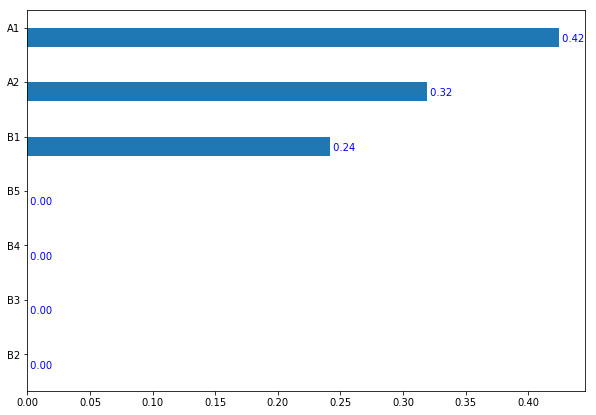

In [161]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(q14_estratos_df.index))

plt1 = ax.barh(ind-width/2, q14_estratos_df.fator, width)

# Etiquetas
for i, v in enumerate( q14_estratos_df.fator ):
    ax.text( v,
            i - 0.2, 
            " {:.2f}".format(v), 
            color='blue', 
            fontweight='regular',
            va='center',
            ha='left',
            )


ax.set_yticks(ind)
ax.set_yticklabels(q14_estratos_df.index)

fig.set_size_inches(10, 7)

plt.show()

15) Considerando os pesos dos artigos de cada estrato do índice geral ({'A1': 1, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C': 0.0}), qual o índice geral relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

In [162]:
# Dicionario de Pesos
q15_pesos = {'A1': 1.0, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C': 0.0}

# DataFrame dos pesos
q15_pesos_df = pd.DataFrame( list(q15_pesos.items())  )
q15_pesos_df.columns = ['IdxRestrito','peso']
q15_pesos_df = q15_pesos_df.set_index('IdxRestrito')

In [163]:
# Obter lista de estratos da questao 13
q15_estratos_df = pd.DataFrame( index = estratos.keys() , data=estratos  )
q15_estratos_df.index.name = "IdxRestrito"

# Merge
q15_estratos_df = pd.merge( q15_estratos_df , q15_pesos_df , left_index = True , right_index = True )

# Calculo do estrato ponderado
q15_estratos_df['ponderado'] = q15_estratos_df['Estrato'] * q15_estratos_df['peso']

# Calculo do ponderado por total docentes
q15_estratos_df['fator'] = q15_estratos_df['ponderado'] / q14_docentes_qty

# Ordenando
q15_estratos_df = q15_estratos_df.sort_values('fator')

q15_estratos_df

,Estrato,peso,ponderado,fator
IdxRestrito,,,,
B4,11,0.10,1.10,0.002552
B5,35,0.05,1.75,0.004060
B2,22,0.50,11.00,0.025522
B3,64,0.20,12.80,0.029698
B1,149,0.70,104.30,0.241995
A2,162,0.85,137.70,0.319490
A1,183,1.00,183.00,0.424594


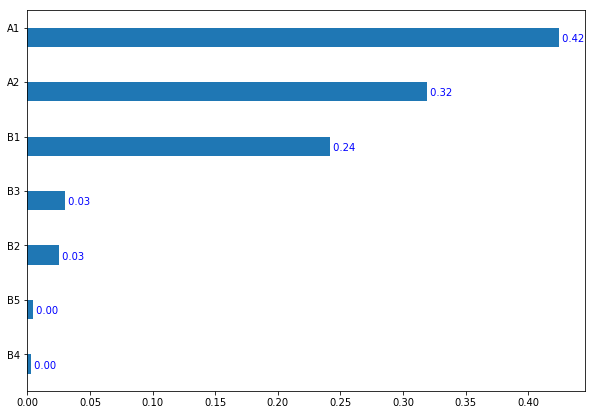

In [164]:
fig, ax = plt.subplots()

width = 0.35

ind = np.arange(len(q15_estratos_df.index))

plt1 = ax.barh(ind-width/2, q15_estratos_df.fator, width)

# Etiquetas
for i, v in enumerate( q15_estratos_df.fator ):
    ax.text( v,
            i - 0.2, 
            " {:.2f}".format(v), 
            color='blue', 
            fontweight='regular',
            va='center',
            ha='left',
            )


ax.set_yticks(ind)
ax.set_yticklabels(q15_estratos_df.index)

fig.set_size_inches(10, 7)

plt.show()